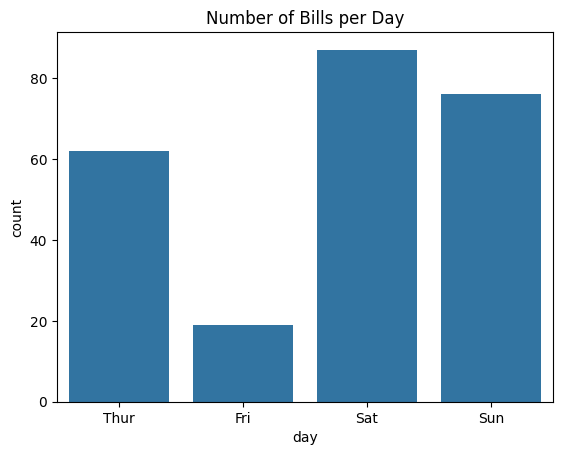

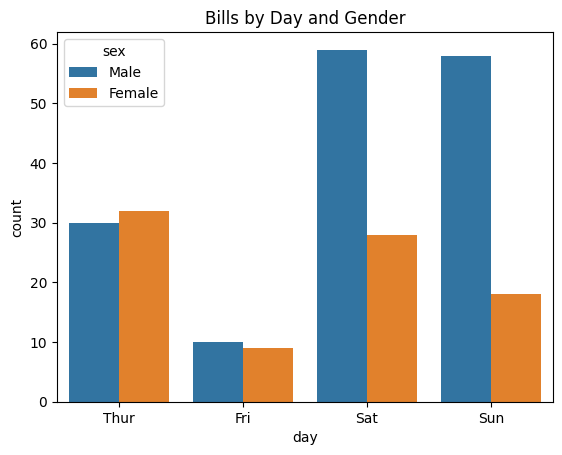

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 
tips = sns.load_dataset('tips')
# Count occurrences
sns.countplot(data=tips, x='day')
plt.title('Number of Bills per Day')
plt.show()

# With hue
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Bills by Day and Gender')
plt.show()

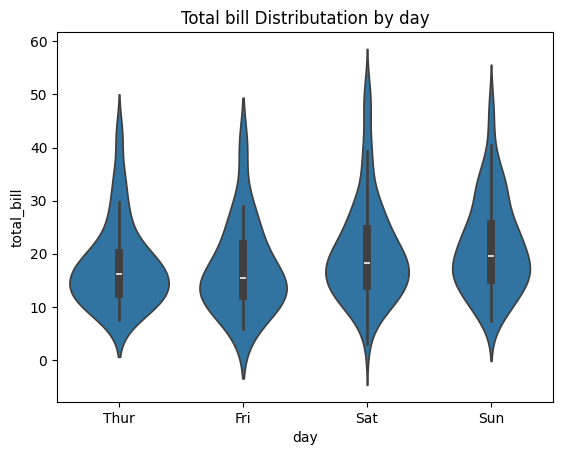

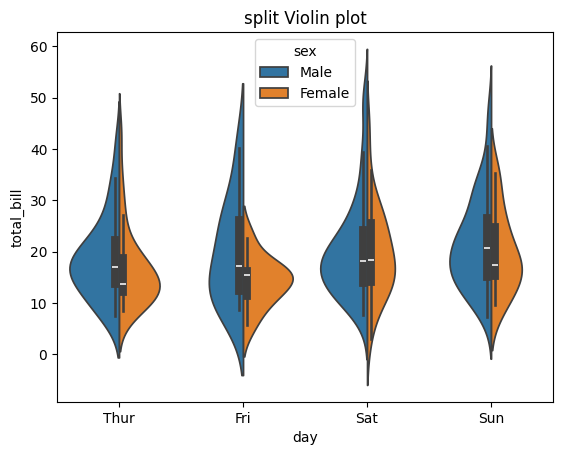

In [10]:
sns.violinplot(data = tips, x ='day',y ='total_bill')
plt.title('Total bill Distributation by day')
plt.show()
#split violin plot
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', split = True)
plt.title('split Violin plot')
plt.show()

Swarm plot

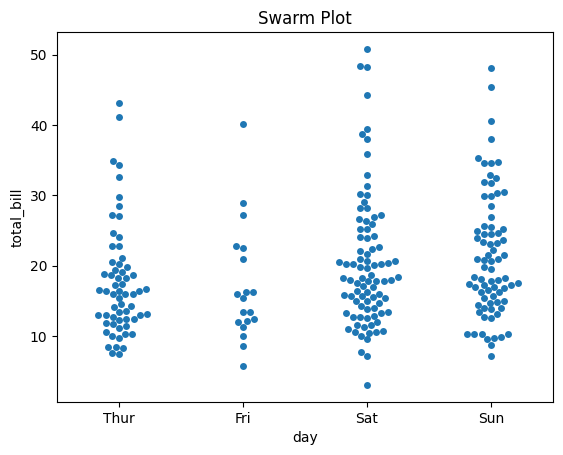

In [11]:
# Like strip plot but no overlap
sns.swarmplot(data=tips, x='day', y='total_bill')
plt.title('Swarm Plot')
plt.show()

In [12]:
#categorial plot
#strip plots 


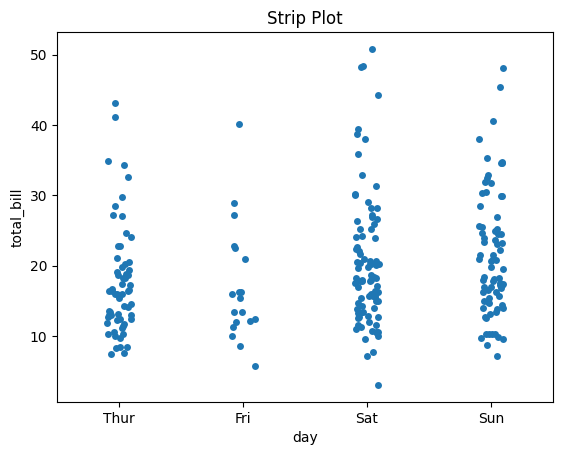

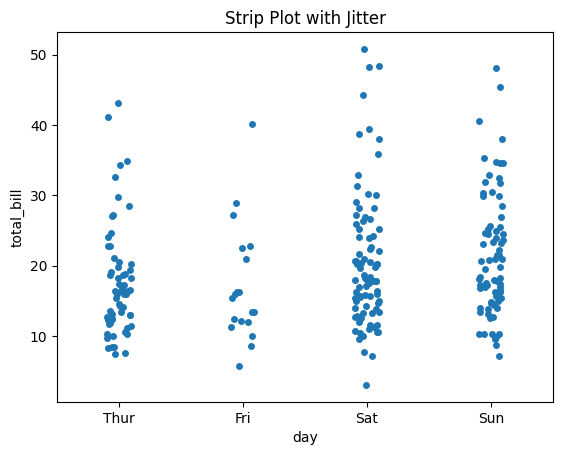

In [13]:
# Show all data points
sns.stripplot(data=tips, x='day', y='total_bill')
plt.title('Strip Plot')
plt.show()

# With jitter
sns.stripplot(data=tips, x='day', y='total_bill', jitter=True)
plt.title('Strip Plot with Jitter')
plt.show()

Intermediate 

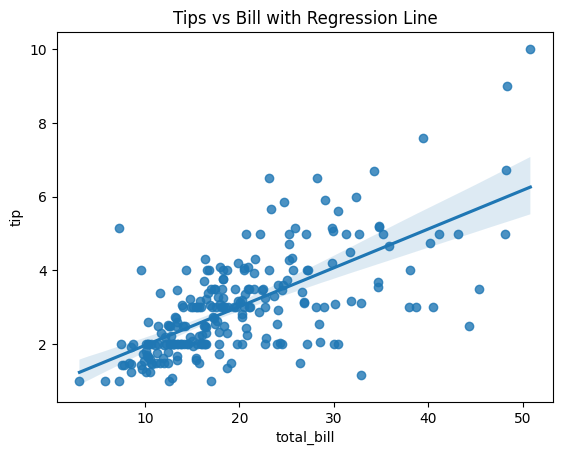

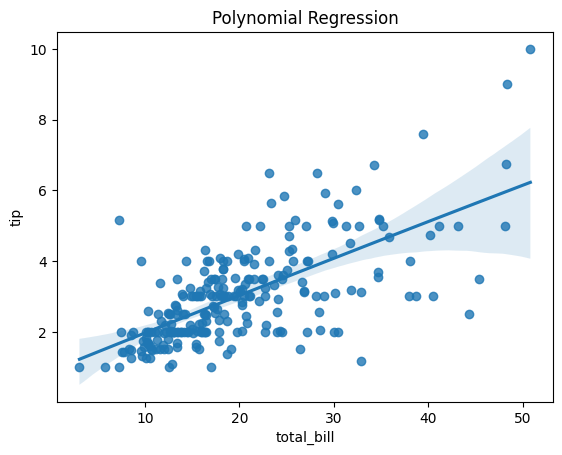

In [14]:
# Scatter plot with trend line
sns.regplot(data=tips, x='total_bill', y='tip')
plt.title('Tips vs Bill with Regression Line')
plt.show()

# Polynomial regression
sns.regplot(data=tips, x='total_bill', y='tip', order=2)
plt.title('Polynomial Regression')
plt.show()

--- First 5 rows of Tips Data ---
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(40.81, 8.0, 'Big Spender!')

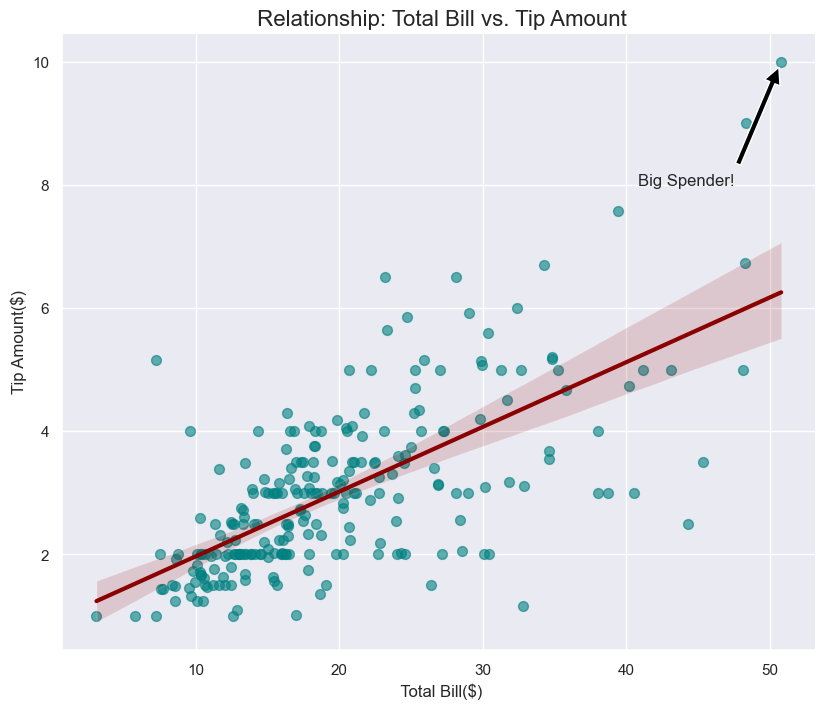

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. Load Built-in Dataset
# ==========================================
# Seaborn has many practice datasets available
tips_data = sns.load_dataset('tips')

print("--- First 5 rows of Tips Data ---")
print(tips_data.head())

# ==========================================
# 2. Create the Plot
# ==========================================
# lmplot = "Linear Model Plot"
# It draws both the scatter points and the regression line automatically.
sns.set_theme(style ="darkgrid") #Make it look nice

#The core command
g = sns.lmplot(
    data = tips_data,
    x = "total_bill",
    y = "tip",
    # ---Customization Options ----
    height = 7 ,  # Size of the graph
    aspect = 1.2,# Width vs Height ratio
    # Scatter point styling
    scatter_kws ={'s': 50, 'alpha': 0.6, 'color':'teal'},

    #Regression line styling 
    line_kws = {'color': 'darkred','linewidth': 3}
) 
# ========================================
# 3. Add Context
#=========================================

#lmplot returns a "FacetGrid" object (g), so we talk to g.ax to set titles.
g.ax.set_title(" Relationship: Total Bill vs. Tip Amount", fontsize = 16)
g.ax.set_xlabel(" Total Bill($)", fontsize = 12)
g.ax.set_ylabel("Tip Amount($)", fontsize = 12)

#Add an annotation to pint out an intresting outlier
#Finding the  biggest tipper 
max_tip_row = tips_data.loc[tips_data['tip'].idxmax()]
g.ax.annotate("Big Spender!",
              xy = ( max_tip_row['total_bill'],max_tip_row['tip']),
              xytext=(max_tip_row['total_bill']-10, max_tip_row['tip']-2),
              arrowprops= dict(facecolor ='black',shrink =0.05))

This is where Seaborn shines. A single line of code allows you to perform Multivariate Analysis—comparing how different groups behave.

We will use the same "Tips" dataset but ask a deeper question: "Do Smokers tip differently than Non-Smokers?" and "Does this change between Lunch and Dinner?"

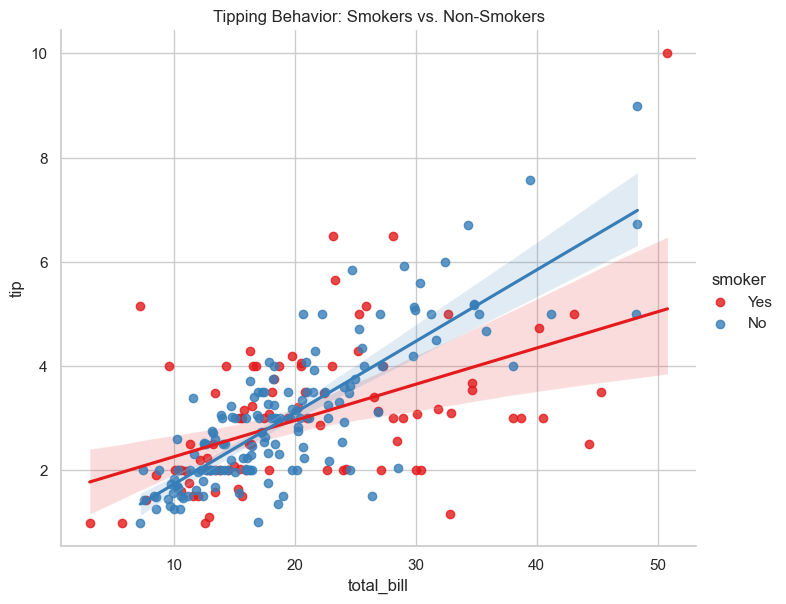

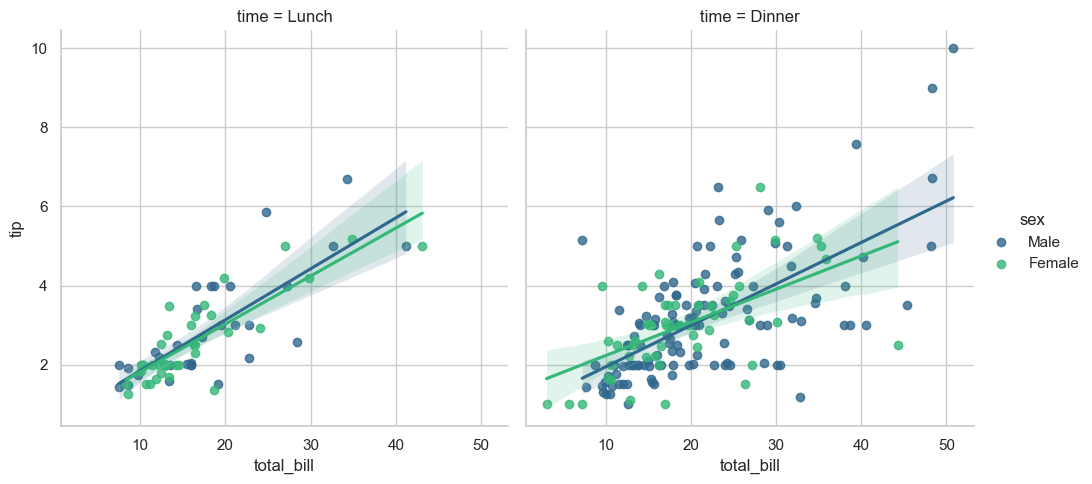

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
tips = sns.load_dataset('tips')

# ==========================================
# Scenario A: The "Hue" Split (Same Graph)
# ==========================================
# Question: Do Smokers have a steeper tipping curve than Non-Smokers?
sns.set_theme(style="whitegrid")

sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",   # Color dots/lines by Smoker status
    palette="Set1", # Red vs Blue
    height=6,
    aspect=1.2
)
plt.title("Tipping Behavior: Smokers vs. Non-Smokers")
plt.show()

# ==========================================
# Scenario B: The "Column" Split (Separate Graphs)
# ==========================================
# Question: Is the relationship different at Lunch vs. Dinner?
sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",     # Create a separate graph for each Time
    hue="sex",      # And INSIDE those graphs, split by Gender
    palette="viridis",
    height=5,
    aspect=1
)
plt.show()